 # NX31 - Data Project

## Introduction

In the following data project, we  will be analyzing the workforce distribution between public and private sector over the total employment. We will futhermore look into, if the workforce distribution has changed from 2008 when the financial crises hit. We then compare the two, to see which contributes the most to the total changes in the workforce for Denmark.  

During the analysis, we will be doing the following.
* Establish an API connection to Statistics Denmark, to feed the analysis data.
* Clean and structure this data.
* Plot the data.
* Make an analysis and compare results.

## Packages imported

We will load the following packages and attributes for this data project.

In [1]:
# These two lines above makes sure that the functions and packages are automatically reloaded each time we run a cell.
%load_ext autoreload
%autoreload 2

In [22]:
# Imports the packages that are needed to run the project in full.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydst
import matplotlib.ticker as mtick
import ipywidgets as widgets
import math

## Data

We have choosen to use the PyDST package that can load data from Statistics Denmark using an API call. As we want to look into the workforce distribution, we start by finding the data we want using our browser on Statistic Denmark. From our research we will need to load the table "LBESK21". We put in the table id we just found, and start off by looking into, what variables that are present in the table.  

We use this information when we load in the data, to only get the data we want.

In [3]:
# Creates a variable that sets the pydst package to load data variables in english
dst = pydst.Dst(lang='en') 

FTE_variables = dst.get_variables(table_id = 'LBESK21')
FTE_variables

,elimination,id,text,time,values
0,False,TAL,unit,False,"[{'id': '1020', 'text': 'Employees'}, {'id': '..."
1,True,SEKTOR,sector,False,"[{'id': '1000', 'text': 'All sectors'}, {'id':..."
2,False,Tid,time,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


In [4]:
# Shows what variables that is contained in the table
FTE_variables['values'][1][:]

[{'id': '1000', 'text': 'All sectors'},
 {'id': '1015', 'text': 'Central government'},
 {'id': '1020', 'text': 'Regional government'},
 {'id': '1025', 'text': 'Municipal government'},
 {'id': '1030', 'text': 'Social security funds'},
 {'id': '1035', 'text': 'Public corporations'},
 {'id': '1040', 'text': 'Private corporations'},
 {'id': '1045', 'text': 'Private nonprofit organizations'},
 {'id': '1050', 'text': 'Sector not stated'}]

We see that the data is split into two categories, employees, which include part-time employees and the likes. We are only interested in full-time employees(FTE) and thus we will only load in the data, containing the FTE.

### Creating Dictionaires

We create the following dictionaries to better structure the data and to create shorter or more precise variable names. </br>
We again use the variable names which we found above to make these dictionaires.

In [5]:
# Creates empty dictionairies, which we fill with keys and a  corresponding values.
columns_dict = {}
columns_dict['TAL'] = 'Type'
columns_dict['SEKTOR'] = 'Sector'
columns_dict['TID'] = 'Quarter'
columns_dict['INDHOLD'] = 'FTE'

var_dict = {} 
var_dict['All sectors'] = 'Total'
var_dict['Central government'] = 'Central'
var_dict['Regional government'] = 'Regional'
var_dict['Municipal government'] = 'Municipal'
var_dict['Social security funds'] = 'Social'
var_dict['Public corporations'] = 'Public corp'
var_dict['Private corporations'] = 'Private corp'
var_dict['Private nonprofit organizations'] = 'Private NPO'
var_dict['Sector not stated'] = 'SNS'

### Importing Data

We now import data from Statistic Denmark using the PyDST. We use the variables we found above, so we only get the data that we need.
In this case we need all data from the table.

In [6]:
# Creates a variable that contains the data from the table, which we give as input.
FTE_raw = dst.get_data(table_id = 'LBESK21', variables = {'SEKTOR':['*'], 'Tid':['*']})

FTE_raw.head(10)

,SEKTOR,TID,TAL,INDHOLD
0,All sectors,2008Q1,Employees,2685665
1,Central government,2008Q1,Employees,187223
2,Regional government,2008Q1,Employees,124952
3,Municipal government,2008Q1,Employees,501721
4,Social security funds,2008Q1,Employees,2056
5,Public corporations,2008Q1,Employees,72477
6,Private corporations,2008Q1,Employees,1729912
7,Private nonprofit organizations,2008Q1,Employees,67086
8,Sector not stated,2008Q1,Employees,238
9,All sectors,2008Q2,Employees,2726255


### Renaming variables
We use the dictionaries to rename the variables names.

In [7]:
FTE_raw.rename(columns = columns_dict, inplace = True) # renames the columns, using the keys,
# which are the current columns names, and use the values in the dictionary instead

for key, value in var_dict.items():
    FTE_raw.Sector.replace(key, value, inplace = True) # runs a for loop to replace the variable names,
    # matching the keys and values from the var_dict

FTE_raw.head(10)

,Sector,Quarter,Type,FTE
0,Total,2008Q1,Employees,2685665
1,Central,2008Q1,Employees,187223
2,Regional,2008Q1,Employees,124952
3,Municipal,2008Q1,Employees,501721
4,Social,2008Q1,Employees,2056
5,Public corp,2008Q1,Employees,72477
6,Private corp,2008Q1,Employees,1729912
7,Private NPO,2008Q1,Employees,67086
8,SNS,2008Q1,Employees,238
9,Total,2008Q2,Employees,2726255


## Analysis and visualization

### Table
We create this table to give a better view of the data, with the quaters as index and the sectors on the columns section. This way allows us to better follow a changes for a given section.

In [8]:
# Creates a copy of our data and pivot the data using the 'Quarter' as the index.
FTE = FTE_raw.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')

FTE.head(10)

Sector,Central,Municipal,Private NPO,Private corp,Public corp,Regional,SNS,Social,Total
Quarter,,,,,,,,,
2008Q1,187223,501721,67086,1729912,72477,124952,238,2056,2685665
2008Q2,190689,505866,66491,1761407,73425,126078,225,2073,2726255
2008Q3,187196,505433,64217,1766624,73789,127646,209,1982,2727098
2008Q4,192216,509358,69312,1737796,73024,127949,198,1978,2711830
2009Q1,191727,511710,68729,1667464,69584,128302,184,1969,2639670
2009Q2,196249,518723,68102,1654744,69837,130237,185,2034,2640111
2009Q3,192614,519586,66431,1637657,69770,132310,211,2042,2620620
2009Q4,198041,523784,71396,1595454,68488,132099,220,2071,2591553
2010Q1,197514,523358,70595,1538682,67471,131693,197,2040,2531550


### Descirbetive statistics

In [9]:
# Gives a table of decribtive statistics for analysis.
FTE_raw.groupby(['Sector']).describe() 

FTE                                                     \
             count          mean           std        min         25%   
Sector                                                                  
Central       44.0  1.972761e+05   3546.189723   187196.0   196231.50   
Municipal     44.0  5.015568e+05  11074.417487   487978.0   493950.50   
Private NPO   44.0  7.334673e+04   4818.857297    64217.0    69844.00   
Private corp  44.0  1.652837e+06  78994.435531  1538587.0  1588668.00   
Public corp   44.0  6.193475e+04   6098.492700    53127.0    56519.50   
Regional      44.0  1.316558e+05   2606.805600   124952.0   129503.25   
SNS           44.0  2.422500e+02     54.634143      151.0      196.25   
Social        44.0  2.127227e+03    100.992715     1969.0     2058.25   
Total         44.0  2.620977e+06  74536.398305  2509505.0  2562858.75   

                                                
                    50%         75%        max  
Sector                                          
Central        197933.5   200077.25   202006.0  
Municipal      497827.5   506913.00   526552.0  
Private NPO     72694.5    77200.75    83356.0  
Private corp  1637596.0  1723270.00  1809460.0  
Public corp     61297.5    66572.75    73789.0  
Regional       132362.0   133762.00   135208.0  
SNS               246.0      286.00      338.0  
Social           2101.5     2172.25     2347.0  
Total         2598587.0  2680055.75  2773787.0

We create a table with descriptive statistics. From this we can make some simple conclusions. 
We see that Private Corp has a higher volatility than the total work force. If we look at the figure below we see that the private workforce is much more volatile than the public. The figure is not great, but it gives us a hint of the changes.
These findings correspond well with our perception of how the private and public workforce move. The public workforce is vary stationary and grows slowly each year. The private workforce is much more mobile to the market, and decreases/increases with the economic growth.

### Plot of sectors in the workforce.

Text(0.5, 1.0, 'Full workforce - Split in sectors')

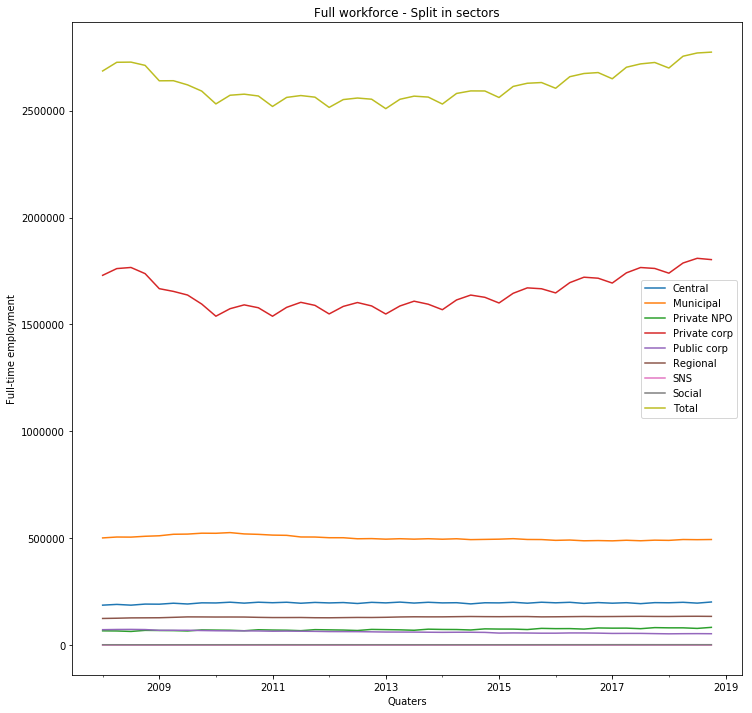

In [10]:
#Creates a figure with only one subplot
fig1, ax = plt.subplots(figsize=(12,12)) 
FTE_raw['Quarter'] = pd.to_datetime(FTE_raw['Quarter']) # Changes variable Quaters to a time format that pandas recognizes

FTE_raw.set_index('Quarter').groupby('Sector')['FTE'].plot(x="Quarter", legend=True, ax=ax);

ax.set_ylabel("Full-time employment") # Sets title for y-axis
ax.set_xlabel('Quaters') # Sets title for x-axis
ax.set_title("Full workforce - Split in sectors") # Sets title for the figure

### Relative changes and merging

We will now calculate all the changes as relative changes.
We create a dataframe for each sector, which include the relative changes for that sector.

In [11]:
rc_central = pd.DataFrame(data=FTE['Central']/FTE['Total']*100)
rc_municipal = pd.DataFrame(FTE['Municipal']/FTE['Total']*100)
rc_privnpo = pd.DataFrame(FTE['Private NPO']/FTE['Total']*100)
rc_privcorp = pd.DataFrame(FTE['Private corp']/FTE['Total']*100)
rc_pubcorp = pd.DataFrame(FTE['Public corp']/FTE['Total']*100)
rc_regional = pd.DataFrame(FTE['Regional']/FTE['Total']*100)
rc_sns = pd.DataFrame(FTE['SNS']/FTE['Total']*100)
rc_social = pd.DataFrame(FTE['Social']/FTE['Total']*100)

In order to plot the relative development later, we need to merge the four dataframes into one. We do this in the following code.

In [12]:
# Merging the dataframes for relative changes on quarters
rFTE_6 = pd.merge(rc_central, rc_municipal, on='Quarter') 
rFTE_5 = pd.merge(rFTE_6, rc_privnpo, on='Quarter')
rFTE_4 = pd.merge(rFTE_5, rc_privcorp, on='Quarter')
rFTE_3 = pd.merge(rFTE_4, rc_pubcorp, on='Quarter')
rFTE_2 = pd.merge(rFTE_3, rc_regional, on='Quarter')
rFTE_1 = pd.merge(rFTE_2, rc_sns, on='Quarter')
rFTE = pd.merge(rFTE_1, rc_social, on='Quarter')

rFTE.head(10)

,0_x,0_y,0_x,0_y,0_x,0_y,0_x,0_y
Quarter,,,,,,,,
2008Q1,6.971197,18.681444,2.497929,64.412799,2.698661,4.652553,0.008862,0.076555
2008Q2,6.994540,18.555344,2.438913,64.609033,2.693255,4.624586,0.008253,0.076038
2008Q3,6.864293,18.533731,2.354774,64.780364,2.705770,4.680653,0.007664,0.072678
2008Q4,7.088055,18.782815,2.555912,64.082041,2.692794,4.718179,0.007301,0.072940
2009Q1,7.263294,19.385378,2.603697,63.169411,2.636087,4.860532,0.006971,0.074593
2009Q2,7.433362,19.647772,2.579513,62.677062,2.645230,4.933012,0.007007,0.077042
2009Q3,7.349940,19.826835,2.534934,62.491204,2.662347,5.048805,0.008052,0.077920
2009Q4,7.641789,20.211202,2.754950,61.563626,2.642740,5.097291,0.008489,0.079913
2010Q1,7.802098,20.673421,2.788608,60.780233,2.665205,5.202070,0.007782,0.080583


### Renaming


We rename the columns for our new dataframe with relative development to reflect the correct titels.

In [13]:
rFTE.columns = ['Central', 'Municipal', 'Private NPO', 'Private corp', 'Public corp', 'Regional', 'SNS', 'Social']
rFTE.head(10)

,Central,Municipal,Private NPO,Private corp,Public corp,Regional,SNS,Social
Quarter,,,,,,,,
2008Q1,6.971197,18.681444,2.497929,64.412799,2.698661,4.652553,0.008862,0.076555
2008Q2,6.994540,18.555344,2.438913,64.609033,2.693255,4.624586,0.008253,0.076038
2008Q3,6.864293,18.533731,2.354774,64.780364,2.705770,4.680653,0.007664,0.072678
2008Q4,7.088055,18.782815,2.555912,64.082041,2.692794,4.718179,0.007301,0.072940
2009Q1,7.263294,19.385378,2.603697,63.169411,2.636087,4.860532,0.006971,0.074593
2009Q2,7.433362,19.647772,2.579513,62.677062,2.645230,4.933012,0.007007,0.077042
2009Q3,7.349940,19.826835,2.534934,62.491204,2.662347,5.048805,0.008052,0.077920
2009Q4,7.641789,20.211202,2.754950,61.563626,2.642740,5.097291,0.008489,0.079913
2010Q1,7.802098,20.673421,2.788608,60.780233,2.665205,5.202070,0.007782,0.080583


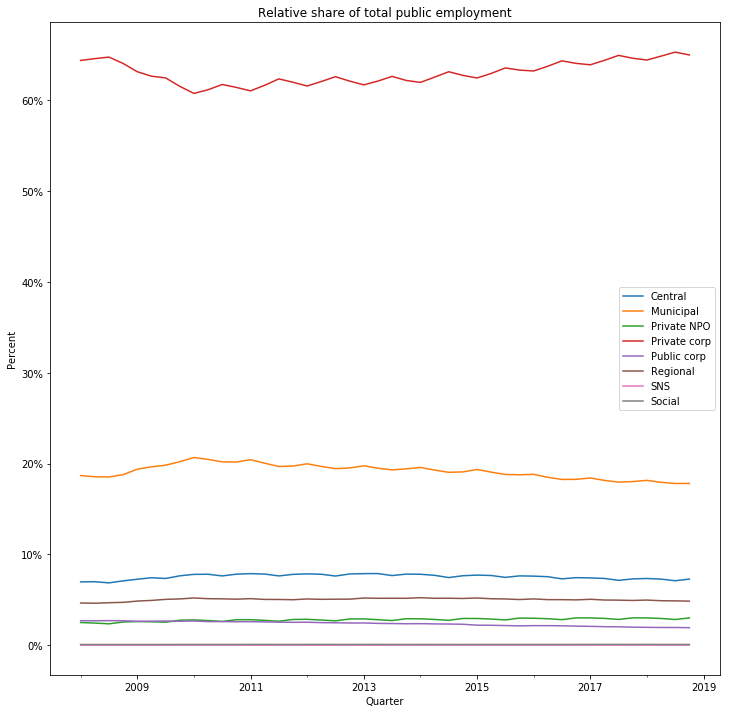

In [14]:
#Creates a figure with only one subplot
fig2, ax = plt.subplots(figsize=(12,12))

rFTE.reset_index(drop=True)
FTE_raw.set_index('Quarter')
rFTE.index = pd.DatetimeIndex(data=rFTE.index)

fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

ax.set_xlabel("Quarters")
ax.set_ylabel("Percent")
ax.set_title("Relative share of total public employment")

rFTE.plot(legend=True, ax=ax);

### Interactive Figure for relative development

Unfortunately it is difficult to see the changes due to the scaling.  
We instead create an interactive figure, with a dropdown, where you can choose which sector you want to look at.


In [15]:
def plot_e(dataframe, Central): ax = dataframe.loc[:,[Central]].plot(figsize=(10,10))

mylist = rFTE.columns.unique().tolist()
widgets.interact(plot_e, dataframe = widgets.fixed(rFTE), Central = widgets.Dropdown(description='Sector', options=mylist) );

interactive(children=(Dropdown(description='Sector', options=('Central', 'Municipal', 'Private NPO', 'Private …

These relative figures shows us different changes. Looking at the municipals, we see a general decrease in employees, we haven't been able to find other reasons, than the government made some economic changes and lowers the subsidy that municipals get from the state. Private Corp has a high drop of approximate 4% in the beginning of the financial crises. This is due to the firms having a hard economic time and thus had to close or layoff people. 

## Public vs. Private

Now that we have looked into the individual components of the workforce, we create a new dataframe, including the total amount of Full-time employees from the private and the public sector and look at the developments in the workforce from a private and public perspective. We again look at the entire periode from 2008 Q1 up till 2018 Q4. 

In [16]:
FTE2 = FTE_raw[(FTE_raw['Sector'] == 'Total')]
FTEG2 = FTE_raw[(FTE_raw['Sector'] == 'Central') + (FTE_raw['Sector'] == 'Regional') + (FTE_raw['Sector'] == 'Municipal') + (FTE_raw['Sector'] == 'Social')]
FTEP2 = FTE_raw[(FTE_raw['Sector'] == 'Private corp') + (FTE_raw['Sector'] == 'Public corp') + (FTE_raw['Sector'] == 'Private NPO')]
# The above lines, create 3 dataframes by selecting only the data we need, FTEs and split it in 3, Public, Private and Total workforce.

print(FTE2.head(10))
print(FTEG2.head(10))
print(FTEP2.head(10))


   Sector    Quarter       Type      FTE
0   Total 2008-01-01  Employees  2685665
9   Total 2008-04-01  Employees  2726255
18  Total 2008-07-01  Employees  2727098
27  Total 2008-10-01  Employees  2711830
36  Total 2009-01-01  Employees  2639670
45  Total 2009-04-01  Employees  2640111
54  Total 2009-07-01  Employees  2620620
63  Total 2009-10-01  Employees  2591553
72  Total 2010-01-01  Employees  2531550
81  Total 2010-04-01  Employees  2572179
       Sector    Quarter       Type     FTE
1     Central 2008-01-01  Employees  187223
2    Regional 2008-01-01  Employees  124952
3   Municipal 2008-01-01  Employees  501721
4      Social 2008-01-01  Employees    2056
10    Central 2008-04-01  Employees  190689
11   Regional 2008-04-01  Employees  126078
12  Municipal 2008-04-01  Employees  505866
13     Social 2008-04-01  Employees    2073
19    Central 2008-07-01  Employees  187196
20   Regional 2008-07-01  Employees  127646
          Sector    Quarter       Type      FTE
5    Public corp 

/Users/michaelemcken/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


To reach our final dataframe containing total, private and public employment, we create three new dataframes for total, private and public employment.
we use the copy/pivot to make sure that our three dataframes have the same index and dimensions.

In [17]:
FTE2_pivot = FTE2.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
# creates a copy and pivot the data using the 'Quarter' as the index
FTE_total = pd.DataFrame(data = FTE2_pivot['Total']) # creates a dataframe

FTEG2_pivot = FTEG2.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
FTEG_total = pd.DataFrame(data = FTEG2_pivot['Central'] + FTEG2_pivot['Regional'] + FTEG2_pivot['Municipal'] + FTEG2_pivot['Social'])
FTEG_total.columns = ['FTEG'] # renames the column  

FTEP2_pivot = FTEP2.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
FTEP_total = pd.DataFrame(data = FTEP2_pivot['Private corp'] + FTEP2_pivot['Public corp'] + FTEP2_pivot['Private NPO'])
FTEP_total.columns = ['FTEP']

print(FTE_total.head(10))
print(FTEG_total.head(10))
print(FTEP_total.head(10))

              Total
Quarter            
2008-01-01  2685665
2008-04-01  2726255
2008-07-01  2727098
2008-10-01  2711830
2009-01-01  2639670
2009-04-01  2640111
2009-07-01  2620620
2009-10-01  2591553
2010-01-01  2531550
2010-04-01  2572179
              FTEG
Quarter           
2008-01-01  815952
2008-04-01  824706
2008-07-01  822257
2008-10-01  831501
2009-01-01  833708
2009-04-01  847243
2009-07-01  846552
2009-10-01  855995
2010-01-01  854605
2010-04-01  861466
               FTEP
Quarter            
2008-01-01  1869475
2008-04-01  1901323
2008-07-01  1904630
2008-10-01  1880132
2009-01-01  1805777
2009-04-01  1792683
2009-07-01  1773858
2009-10-01  1735338
2010-01-01  1676748
2010-04-01  1710503


Now we merge the three dataframes to get our desired dataframe.

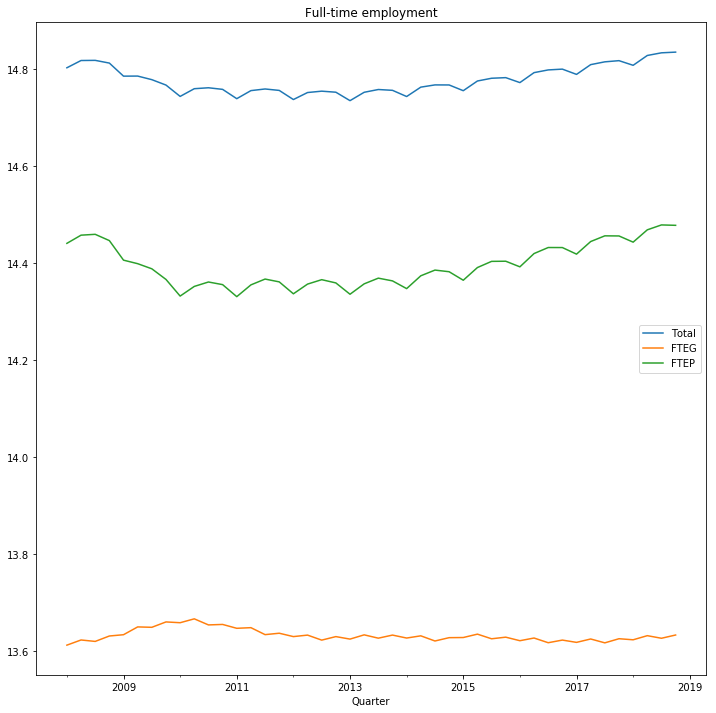

In [24]:
FTE1 = pd.merge(FTE_total, FTEG_total, on='Quarter') # merging total and public employment
FTE = pd.merge(FTE1, FTEP_total, on='Quarter') # merging private employment with total and public employment

FTE_log = np.log(FTE)
FTE_log.index = pd.DatetimeIndex(data=FTE_log.index) # sets the index to a time index, which is still Quarter but in another format

FTE_log.plot(figsize=(12,12), title='Full-time employment') # plots our final figure

## Conclusion

In 2010 we see the lowest private employment in the period, where the private employment is close to 1.3 million employees, almost 300.000 lower than the peak before the crises. From 2010 the employment slowly grows from 2010 and up to around the same level as before the crises, in 2018 Q4.

From the figure above we see that the majority of the cotribution to the changes in the total employments, stems from the private sector. The public sector is relatively flat, which makes sense intuatively, as the public sector is less exposed to conjuctions as well as the grotwh or decrease is politically decided.
